In [293]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [294]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [295]:
len(words)

32033

In [296]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)
print(stoi)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [297]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [298]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [299]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [300]:
C = torch.randn((27, 2))

In [301]:
X.shape

torch.Size([228146, 3])

In [302]:
# for each of the (228146,3) Xes, we retrieve the 2-dim vector
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [303]:
X[3]

tensor([ 5, 13, 13])

In [304]:
C[X[3]]

tensor([[ 0.8358, -0.2896],
        [ 1.4075, -0.8839],
        [ 1.4075, -0.8839]])

In [305]:
# hidden layer h
# 6 = 3x2 because we have 2-dim embeddings and we have 3 of them
# 100 = random variable of neurons
W1 = torch.randn((6, 100)) 
b1 = torch.randn(100)

In [306]:
# we can't multiply [228146, 3, 2] by [6, 100]
# we have to transform [228146, 3, 2] to [228146, 6]
# Using emb.view(228146, 6) the 2-dim arrays are stacked in the same row. 
# We use -1 when we don't know the fixed length and want to find it at runtime
# the bias vector b1 will be added to all the rows of the matrix (broadcasting)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [307]:
h

tensor([[-0.2020, -0.9981, -0.7343,  ...,  0.5504,  0.6700,  0.5533],
        [-0.1067, -0.9993, -0.8322,  ...,  0.7735,  0.7652,  0.2340],
        [-0.0566, -1.0000, -0.7418,  ...,  0.9251,  0.9760, -0.7765],
        ...,
        [-0.9737, -0.9710, -0.9957,  ...,  0.5164,  1.0000, -0.0875],
        [-0.1810, -0.9968, -1.0000,  ...,  0.9988,  0.8750,  0.1637],
        [-0.5959, -0.9932,  0.8800,  ..., -0.4942,  0.9954, -0.9644]])

In [308]:
h.shape

torch.Size([228146, 100])

In [309]:
# final layer, input = 100 and output/logits will be 27
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [310]:
logits = h @ W2 + b2

In [311]:
logits.shape

torch.Size([228146, 27])

In [312]:
counts = logits.exp()

In [313]:
prob = counts / counts.sum(1, keepdims=True)

In [314]:
prob.shape

torch.Size([228146, 27])

In [315]:
loss = -prob[-1, Y].log().mean()
loss

tensor(15.3181)

In [316]:
# ------------ now made respectable :) ---------------

In [317]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [318]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [319]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [320]:
for p in parameters:
  p.requires_grad = True

In [321]:
# how to find the right learning rate? keep track of them
# plot them wrt loss and find the minimum from the plot
# 10**-3 = 0.001, 10**0, 1000 elements
lre = torch.linspace(-3, 0, 10000)
lrs = 10**lre

In [322]:
lri = [] # learning rate at step i
lossi = []
stepi = []

In [323]:
# it's not performant to forward and backward on all the 182625 rows.
# we can create minibatches.

for i in range(10000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,)) # 32 random numbers between 0 and 182625
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  lr = lrs[i]
  #lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lri.append(lr)
  lossi.append(loss.log10().item())

  print(loss.item(), end="\r")

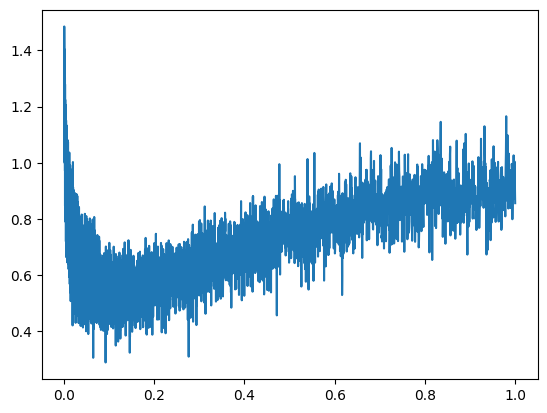

In [324]:
plt.plot(lri, lossi)

In [325]:
# Important: as the capacity of the NN grows, if data is the same it will
# overfit your training data. 
# This means the NN will sample exactly the same words from the training data.

In [326]:
# training split - used to train you parameters
# dev/validation split - used to train the hyperparameters (you can try variations)
# test split - you shouldn't learn/train from here, you use it for verification.
# 80%, 10%, 10%

In [327]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(8.0721, grad_fn=<NllLossBackward0>)

In [328]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(8.1319, grad_fn=<NllLossBackward0>)

In [ ]:
# the bottlneck could be the embeddings dimension (ie. 2) you could try increasing it.
# you wouldn't be able to visualize C as done below though.

# you want to make various attempts and try to improve the performance on the dev set.
# once you found it you would try the test set (the final result after you finished experiments).

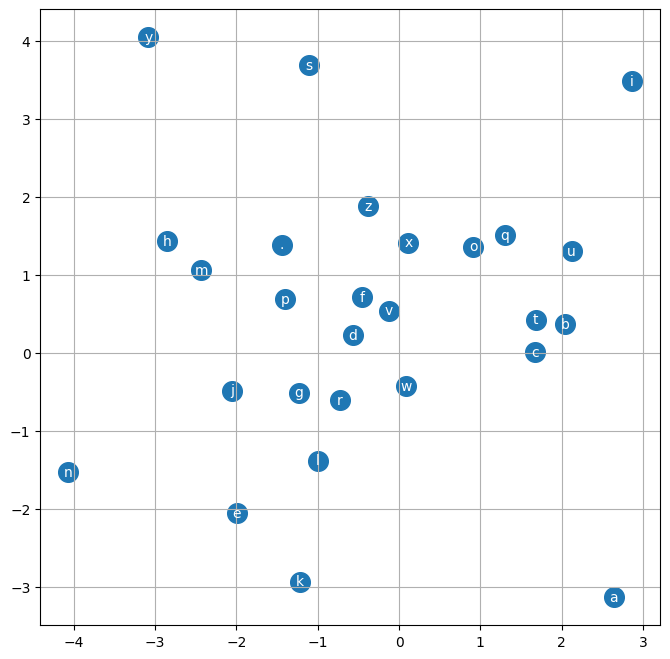

In [292]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
# how are they clustered? vowels for example? what are the exceptions/outliers?
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
context = [0] * block_size
C[torch.tensor([context])].shape

In [ ]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))